In [1]:
!pip install transformers
!pip install bert-extractive-summarizer
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Unlabelled test datset.xlsx to Unlabelled test datset.xlsx
Saving Dataset Problem statement 3.xlsx to Dataset Problem statement 3.xlsx


In [ ]:
import io
# df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
dftr = pd.read_excel(io.BytesIO(uploaded['Dataset Problem statement 3.xlsx']))

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
dft = pd.read_excel(io.BytesIO(uploaded['Unlabelled test datset.xlsx']))

In [ ]:
from summarizer import Summarizer,TransformerSummarizer

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
body = '''
       Scientists say they have discovered a new species of orangutans on Indonesia’s island of Sumatra.
The population differs in several ways from the two existing orangutan species found in Sumatra and the neighboring island of Borneo.
The orangutans were found inside North Sumatra’s Batang Toru forest, the science publication Current Biology reported.
Researchers named the new species the Tapanuli orangutan. They say the animals are considered a new species because of genetic, skeletal and tooth differences.
Michael Kruetzen is a geneticist with the University of Zurich who has studied the orangutans for several years. He said he was excited to be part of the unusual discovery of a new great ape in the present day. He noted that most great apes are currently considered endangered or severely endangered.
Gorillas, chimpanzees and bonobos also belong to the great ape species.
Orangutan – which means person of the forest in the Indonesian and Malay languages - is the world’s biggest tree-living mammal. The orange-haired animals can move easily among the trees because their arms are longer than their legs. They live more lonely lives than other great apes, spending a lot of time sleeping and eating fruit in the forest.
The new study said fewer than 800 of the newly-described orangutans exist. Their low numbers make the group the most endangered of all the great ape species.
They live within an area covering about 1,000 square kilometers. The population is considered highly vulnerable. That is because the environment which they depend on is greatly threatened by development.
Researchers say if steps are not taken quickly to reduce the current and future threats, the new species could become extinct “within our lifetime.”
Research into the new species began in 2013, when an orangutan protection group in Sumatra found an injured orangutan in an area far away from the other species. The adult male orangutan had been beaten by local villagers and died of his injuries. The complete skull was examined by researchers.
Among the physical differences of the new species are a notably smaller head and frizzier hair. The Tapanuli orangutans also have a different diet and are found only in higher forest areas.
There is no unified international system for recognizing new species. But to be considered, discovery claims at least require publication in a major scientific publication.
Russell Mittermeier is head of the primate specialist group at the International Union for the Conservation of Nature. He called the finding a “remarkable discovery.” He said it puts responsibility on the Indonesian government to help the species survive.
Matthew Nowak is one of the writers of the study. He told the Associated Press that there are three groups of the Tapanuli orangutans that are separated by non-protected land.He said forest land needs to connect the separated groups.
In addition, the writers of the study are recommending that plans for a hydropower center in the area be stopped by the government.
It also recommended that remaining forest in the Sumatran area where the orangutans live be protected.
I’m Bryan Lynn.

        '''

In [ ]:
bert_model = Summarizer()

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
dftr

,Product,Job Role,Verbatim Feedback,Sentiment (1=Positive & 0= Negative)
0,IX,XYZ,There is no maintenance menu,0
1,IX,Architect,Very buggy.,0
2,IX,PQR,High quality - standards,1
3,IX,Sales Specialist,Features missing,0
4,IX,Architect,how to do the inter-working,0
...,...,...,...,...
382,QK,TECHNICAL LEADER.CUSTOMER Executive,uninteresting GUI,0
383,QK,Engineer - Customer Support,UI is interactive,1
384,QK,TECHNICAL LEADER.CUSTOMER Executive,Totally instable.. Enginieering quallity has d...,0
385,QK,Support.CUSTOMER Executive,Lack of work around this,0


In [ ]:
dftr[dftr['Job Role'] == 'Sales Specialist']

,Product,Job Role,Verbatim Feedback,Sentiment (1=Positive & 0= Negative)
3,IX,Sales Specialist,Features missing,0
6,IX,Sales Specialist,Not much deployed,0
23,QK,Sales Specialist,Waiting for more \nTime and Security feature set,1
46,QK,Sales Specialist,Good,1
86,DX,Sales Specialist,usage varied,1
120,DX,Sales Specialist,Good,1
130,DX,Sales Specialist,Excellent delivery,1
182,IX,Sales Specialist,missing features,1
184,IX,Sales Specialist,Slotting rules are very cumbersome.Too many ru...,0
252,QK,Sales Specialist,Product in good competition with lots of varia...,1


In [ ]:
dftr[['Product  ', 'Job Role']].groupby(['Product  ']).apply(lambda x:' '.join(x['Job Role'].unique()))

Product  
DX    XYZ Architect Sales Specialist PQR Systems Eng...
IX    XYZ Architect PQR Sales Specialist Support Ope...
QK    XYZ PQR Architect Leader, Client Executive Sal...
dtype: object

In [ ]:
dfk = pd.DataFrame(dft.groupby(['Job Role'], group_keys= False)['Verbatim Feedback '].apply(lambda x:'. '.join(x)))

In [ ]:
dfk = dfk.reset_index()

In [ ]:
dfk.columns = ['job', 'feedback']

In [ ]:
body = dfk['feedback'][2]
''.join(bert_model(body, max_length=20, min_length=10))

''

In [ ]:
dftr['Job Role'].value_counts()

Architect                                           60
Support                                             54
XYZ                                                 28
Engineer                                            22
Architect.SALES                                     19
PQR                                                 18
Manager                                             16
Support.CUSTOMER Executive                          14
Sales Specialist                                    12
Operations                                          12
Systems Engineer                                    11
TECHNICAL LEADER.CUSTOMER Executive                 10
Leader, Customer Executive                          10
Solutions                                            9
Engineer.CUSTOMER Executive                          8
SYSTEMS ENGINEER.SALES                               7
Leader, Client Executive                             6
Engineer - Network [C]                               4
XYZ.SALES 

In [ ]:
dft['Job Role'].value_counts()

Architect                             31
Engineer                              20
Support                               11
XYZ                                   10
Manager                                9
Systems Engineer                       8
Sales Specialist                       6
PQR                                    6
Operations                             5
Solutions                              5
Engineer - Consultant [C]              4
PrincipalabcArchitect                  3
Leader, Regionalabc                    2
Leader, Customer Executive             2
High Touch Operations Manager          2
Sales Business Development Manager     1
Leader, Client Executive               1
Business SolutionsArchitect            1
SecurityCustomer Success Executive     1
CXO                                    1
Customer Service & Support [C]         1
Name: Job Role, dtype: int64

In [ ]:
dftr['Verbatim Feedback '][0]

'There is no  maintenance menu'

In [ ]:
dftr

,Product,Job Role,Verbatim Feedback,Sentiment (1=Positive & 0= Negative)
0,IX,XYZ,There is no maintenance menu,0
1,IX,Architect,Very buggy.,0
2,IX,PQR,High quality - standards,1
3,IX,Sales Specialist,Features missing,0
4,IX,Architect,how to do the inter-working,0
...,...,...,...,...
382,QK,TECHNICAL LEADER.CUSTOMER Executive,uninteresting GUI,0
383,QK,Engineer - Customer Support,UI is interactive,1
384,QK,TECHNICAL LEADER.CUSTOMER Executive,Totally instable.. Enginieering quallity has d...,0
385,QK,Support.CUSTOMER Executive,Lack of work around this,0


In [ ]:
dftr

,Product,Job Role,Verbatim Feedback,Sentiment (1=Positive & 0= Negative)
0,IX,XYZ,There is no maintenance menu,0
1,IX,Architect,Very buggy.,0
2,IX,PQR,High quality - standards,1
3,IX,Sales Specialist,Features missing,0
4,IX,Architect,how to do the inter-working,0
...,...,...,...,...
382,QK,TECHNICAL LEADER.CUSTOMER Executive,uninteresting GUI,0
383,QK,Engineer - Customer Support,UI is interactive,1
384,QK,TECHNICAL LEADER.CUSTOMER Executive,Totally instable.. Enginieering quallity has d...,0
385,QK,Support.CUSTOMER Executive,Lack of work around this,0


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.3 MB/s 
     |████████████████████████████████| 1.3 MB 70.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e1339f5ddd76fe506af458581e08a7cfdc7a885d32892ad9b0f434ea5329dd18
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
import numpy as np
X = np.array(dftr['Verbatim Feedback '])
y = dftr['Sentiment (1=Positive & 0= Negative)']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = model.encode(X_train_)
X_test = model.encode(X_test_)

In [ ]:
import numpy as np

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
np.array(y_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.90      0.80      0.85        35

    accuracy                           0.87        78
   macro avg       0.88      0.87      0.87        78
weighted avg       0.87      0.87      0.87        78



In [ ]:
X_test_[9]

'Good quality'

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.2 MB/s 


In [ ]:
#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = 1

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = -1

    else :
        overall_sentiment = 0
  
    return negative, neutral, positive, compound, overall_sentiment

In [ ]:
dftr['Verbatim Feedback '].apply(lambda x:sentiment_vader(x))

0       (0.355, 0.645, 0.0, -0.296, -1)
1               (0.0, 1.0, 0.0, 0.0, 0)
2               (0.0, 1.0, 0.0, 0.0, 0)
3       (0.688, 0.312, 0.0, -0.296, -1)
4               (0.0, 1.0, 0.0, 0.0, 0)
                     ...               
382             (0.0, 1.0, 0.0, 0.0, 0)
383             (0.0, 1.0, 0.0, 0.0, 0)
384             (0.0, 1.0, 0.0, 0.0, 0)
385    (0.365, 0.635, 0.0, -0.3182, -1)
386             (0.0, 1.0, 0.0, 0.0, 0)
Name: Verbatim Feedback , Length: 387, dtype: object

In [ ]:
dftr

,Product,Job Role,Verbatim Feedback,Sentiment (1=Positive & 0= Negative)
0,IX,XYZ,There is no maintenance menu,0
1,IX,Architect,Very buggy.,0
2,IX,PQR,High quality - standards,1
3,IX,Sales Specialist,Features missing,0
4,IX,Architect,how to do the inter-working,0
...,...,...,...,...
382,QK,TECHNICAL LEADER.CUSTOMER Executive,uninteresting GUI,0
383,QK,Engineer - Customer Support,UI is interactive,1
384,QK,TECHNICAL LEADER.CUSTOMER Executive,Totally instable.. Enginieering quallity has d...,0
385,QK,Support.CUSTOMER Executive,Lack of work around this,0


In [ ]:
model.predict(X)

ValueError: ignored

In [ ]:
!pip install happytransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 3.5 MB/s 
     |████████████████████████████████| 452 kB 49.6 MB/s 
     |████████████████████████████████| 213 kB 82.6 MB/s 
     |████████████████████████████████| 132 kB 77.2 MB/s 
     |████████████████████████████████| 127 kB 74.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from happytransformer import HappyTextClassification

In [ ]:
happy_tc = HappyTextClassification(model_type="DISTILBERT", model_name="distilbert-base-uncased-finetuned-sst-2-english", num_labels=2)

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
result = happy_tc.classify_text("hello")

In [ ]:
result.label

'POSITIVE'

In [ ]:
dftr['prd'] = dftr['Verbatim Feedback '].apply(happy_tc.classify_text)

In [ ]:
dftr['prd'] = dftr['prd'].apply(lambda x:1 if x.label[0]=='P' else 0)

In [ ]:
print(classification_report(dftr['Sentiment (1=Positive & 0= Negative)'], dftr['prd']))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       213
           1       0.86      0.78      0.82       174

    accuracy                           0.84       387
   macro avg       0.85      0.84      0.84       387
weighted avg       0.84      0.84      0.84       387



In [ ]:
st = ('. '.join(dftr[(dftr['prd']==0) & (dftr['Product  ']=='IX') & (dftr['Job Role']=='Support')]['Verbatim Feedback ']))

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


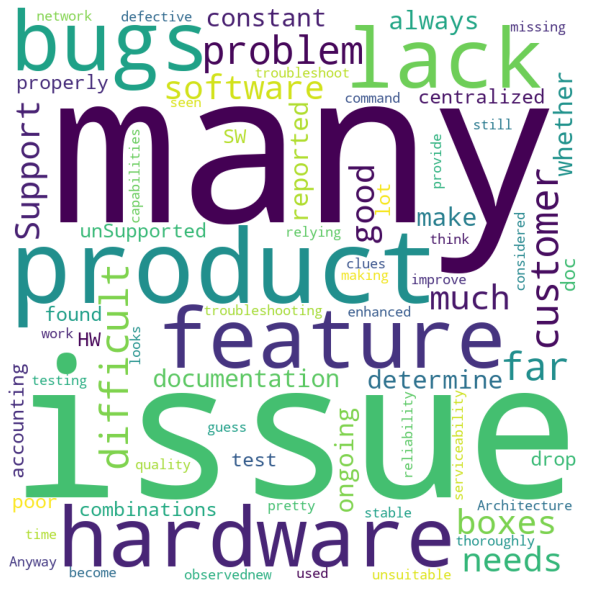

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(st)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
st

'The problem has always been constant..  Some ongoing issues so far.Few issues reported so far on customer.. There are many bugs that make it difficult to determine whether it is software or hardware. lacks of documentation of unSupported features and features combinations. . We found a HW issue. Could be SW.There is a lot of doc. It would be good to centralized.. needs to test this boxes properly. Very poor drop accounting and troubleshooting capabilities.  Support is pretty much guess work and relying on other boxes in the network to provide the missing clues.. good product with enhanced Architecture , but this product also needs time to become as stable. I think there are still bugs that can only be considered lack of testing. Both software and hardware should be  improve..  defective hardware. not many issue observednew product not seen much used by customer.  So many feature and command are not Support making it a very difficult product to troubleshoot. Lack of serviceability and 

In [ ]:
bert_summary = ''.join(bert_model(st, min_length=10))
print(bert_summary)

The problem has always been constant..  Some ongoing issues so far. Support is pretty much guess work and relying on other boxes in the network to provide the missing clues.. good product with enhanced Architecture , but this product also needs time to become as stable. Both software and hardware should be  improve..  defective hardware. Lack of serviceability and reliability.


In [ ]:
st = ''.join(st.split('. '))

In [ ]:
bert_summary = ' '.join(bert_model(st, min_length=10))
print(bert_summary)

T h e   p r o b l e m   h a s   a l w a y s   b e e n   c o n s t a n t .   d e f e c t i v e   h a r d w a r e n o t   m a n y   i s s u e   o b s e r v e d n e w   p r o d u c t   n o t   s e e n   m u c h   u s e d   b y   c u s t o m e r   S o   m a n y   f e a t u r e   a n d   c o m m a n d   a r e   n o t   S u p p o r t   m a k i n g   i t   a   v e r y   d i f f i c u l t   p r o d u c t   t o   t r o u b l e s h o o t L a c k   o f   s e r v i c e a b i l i t y   a n d   r e l i a b i l i t y I t   l o o k s   l i k e   t h e r e   a r e   t o o   m a n y   b u g s t h o r o u g h l y .


RATINGS


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence)  
    return sentiment_dict['compound']

In [ ]:
dftr['Verbatim Feedback '].apply(lambda x:sentiment_scores(x))

0     -0.2960
1      0.0000
2      0.0000
3     -0.2960
4      0.0000
        ...  
382    0.0000
383    0.0000
384    0.0000
385   -0.3182
386    0.0000
Name: Verbatim Feedback , Length: 387, dtype: float64

In [ ]:
# d=dftr[dftr['Job Role'] == 'Sales Specialist']
# s=d['Verbatim Feedback '].apply(lambda x:sentiment_scores(x))
# z=s.reset_index(level=None, drop=True, name=None, inplace=False)
# rating=0
# for i in range(z.count()):
#   rating=rating+z[i]
# rating =rating/z.count()
# rating*5

# ## Lowest rating 0 and highest rating 5 ##

In [ ]:
m=dft['Job Role'].unique()
m[0]

'Operations'

In [ ]:
m=dft['Job Role'].unique()
for name in m:
  d=dft[dft['Job Role'] == name]
  s=d['Verbatim Feedback '].apply(lambda x:sentiment_scores(x))
  z=s.reset_index(level=None, drop=True, name=None, inplace=False)
  rating=0
  for i in range(z.count()):
    rating=rating+z[i]
  round_rating=round(rating,2)
  if z.count()>0:
    rating =rating/z.count()
    norm_rate=((rating+1)/2)*5
    print(name, ": ", norm_rate)
  else:
    print(name,": ", 2.5)

## Lowest rating 0 and highest rating 5 ##

Operations :  2.5396
Architect :  2.4968629032258063
Sales Specialist :  3.4439583333333337
Systems Engineer :  3.14071875
Solutions :  3.0776
PrincipalabcArchitect :  3.0334166666666667
PQR :  2.5637916666666665
XYZ :  2.544525
Support :  2.7067727272727273
Engineer - Consultant [C] :  2.7005625
Manager :  2.6000833333333335
Engineer :  2.8315625
Leader, Regionalabc :  2.7043749999999998
Sales Business Development Manager :  2.5
Leader, Client Executive :  4.09225
Business SolutionsArchitect :  2.7567500000000003
Leader, Customer Executive :  1.1936250000000002
SecurityCustomer Success Executive :  2.5
High Touch Operations Manager :  1.9313749999999998
CXO :  3.6917500000000003
Customer Service & Support [C] :  1.353
